In [46]:
#!pip install qutip

In [47]:
import numpy as np
import qutip as qq
import matplotlib.pyplot as plt

Creating a Qubit with values 0 or 1

In [48]:
qbit = np.zeros((2))
qbit[1] = 1
print(qbit)

[0. 1.]


Measuring 1 Qubit

In [49]:
def measure(m):
    return np.random.choice(m)

Measuring 1000 shots

In [50]:
shots = 0
for i in range(1000):
    shots += measure(qbit)
    
print(shots/1000)

0.531


In [51]:
state = qq.rand_ket(2)
print(state)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.02848215+0.68058392j]
 [-0.28078956-0.67612981j]]


# QuTip

In [52]:
obj = qq.rand_ket(2)
print(obj)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.34970415+0.4933106j]
 [ 0.76893473+0.2075838j]]


In [53]:
#print(state * obj)

Plot Sphere

In [54]:
state.diag()

array([0.02848215+0.68058392j])

In [55]:
def showQubit(bit):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection="3d")
    sphere = qq.Bloch(axes = ax)
    sphere.add_states(bit)
    sphere.show()

In [56]:
from qutip.measurement import measure
measure(state,qq.sigmaz())[0]


1.0

<Figure size 500x500 with 0 Axes>

-1.0
1.0


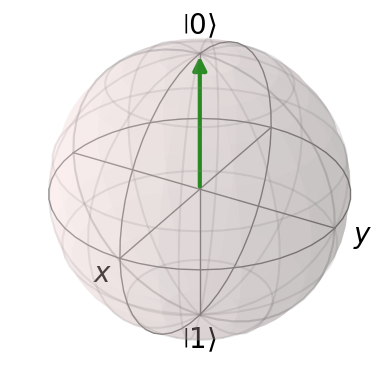

In [57]:
#state = qq.rand_ket(2)
state = qq.basis(2,0)
showQubit(state)
print(measure(state,qq.sigmay())[0])
print(measure(state,qq.sigmax())[0])

In [84]:
def tree( tns ):
    if len(tns)>3:
        return qq.tensor([tree(tns[:len(tns)//2]),tree(tns[(len(tns)//2) + 1:])])
    else: return qq.tensor(tns)

In [85]:
q1 = qq.Qobj([[2],[1]]) #1,1,1
q2 = qq.Qobj([[1],[0.5]]) #1,1,0

print(q1)
print(q2)
sol = tree([q1,q2,q1,q2,q1]).__array__().real
print(sol.reshape(int(len(sol)**0.5),int(len(sol)**0.5)//1))

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[2.]
 [1.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1. ]
 [0.5]]
[[4.   2.   2.   1.  ]
 [2.   1.   1.   0.5 ]
 [2.   1.   1.   0.5 ]
 [1.   0.5  0.5  0.25]]


In [60]:
a = qq.tensor([q1,q2]).__array__()

In [62]:
a.real.reshape(2,2)

array([[2. , 1. ],
       [1. , 0.5]])